Easy
1. How many unique customers are in the dataset?

In [3]:
import pandas as pd
ds=pd.read_csv('fct_invoice.csv')
unique_customer_count=ds['customer_id'].unique()
f'There are {len(unique_customer_count)} unique customers in the dataset'

'There are 5191 unique customers in the dataset'

2. What are the different categories of products available? How many unique categories are there?

In [5]:
import pandas as pd

ds=pd.read_csv('fct_invoice.csv')
categories=ds['category'].unique()
print("Different Product Categories:")
for category in categories: 
    print(category)

f'There are {len(category)} unique categories'

Different Product Categories:
Clothing
Shoes
Books
Cosmetics
Food & Beverage
Toys
Technology
Souvenir


'There are 8 unique categories'

3. Which payment method is the most popular? How many times was it used?

In [7]:
import pandas as pd

ds=pd.read_csv('fct_invoice.csv')
payment_methods=ds['payment_method'].value_counts()
popular_payment_method = payment_methods.index[0]
popular_payment_method_count = payment_methods.iloc[0]
print(f"The most common payment method is: {popular_payment_method}")
print(f"It appears {popular_payment_method_count} times.")

The most common payment method is: Cash
It appears 44447 times.


Medium
1. What are the three most popular categories, by total sales?

In [11]:
import pandas as pd
import numpy as np

df = pd.read_csv('fct_invoice.csv')
df['total_sales'] = df['quantity'] * df['price']
category_sales = df.groupby('category')['total_sales'].sum()
sorted_category_sales = category_sales.sort_values(ascending=False)
top_3 = sorted_category_sales.head(3)
top_3=dict(top_3)
first_key=list(top_3.keys())[0]
first_item=top_3[first_key]
f'The most popular category by total sales is {first_key} with {np.round(first_item,2)}'

'The most popular category by total sales is Clothing with 113996791.04'

2. What are the total sales attributed to customers over the age of 45?

In [3]:
import pandas as pd
import numpy as np

df1 = pd.read_json('dim_customer.json')
df2 = pd.read_csv('fct_invoice.csv')
filtered = df1.loc[df1['age'] > 45]
df2['total_sales'] = df2['price'] * df2['quantity']
merged_df = pd.merge(df2, filtered, how='inner', left_on='customer_id', right_on='id')
total_sales = merged_df['total_sales'].sum()
print('The total sales from customers over the age of 45:', np.round(total_sales, 2))

The total sales from customers over the age of 45: 82039768.15


3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

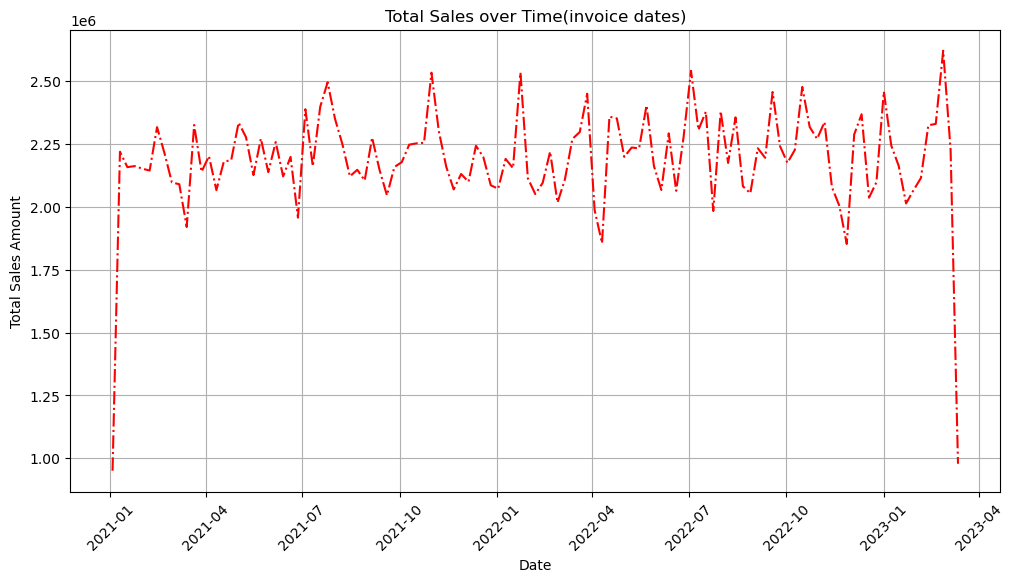

'Yes, there are clear seasonal trends with recurring peaks and troughs in sales over time, indicating an annual cyclical pattern. Sales tend to increase around the start and end of each year and show variations within each year that could correspond to specific months or quarters.'

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('fct_invoice.csv')
df['total_sales'] = df['quantity'] * df['price']
df['invoice_date'] = pd.to_datetime(df['invoice_date'], dayfirst=True)
df.set_index('invoice_date', inplace=True)
sales = df['total_sales'].resample('W').sum()

plt.figure(figsize=(12, 6))
plt.plot(sales.index, sales.values, linestyle='-.', color='r')
plt.title('Total Sales over Time(invoice dates)')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

f"Yes, there are clear seasonal trends with recurring peaks and troughs in sales over time, indicating an annual cyclical pattern. Sales tend to increase around the start and end of each year and show variations within each year that could correspond to specific months or quarters."

Hard
1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [13]:
import pandas as pd

dim_customer = pd.read_json('dim_customer.json')
fct_invoice = pd.read_csv('fct_invoice.csv')
fct_invoice['total_sales'] = fct_invoice['quantity'] * fct_invoice['price']
df = pd.merge(fct_invoice, dim_customer, how='left', left_on='customer_id', right_on='id')
df['age_range'] = (df['age'] // 10 * 10).astype(str) + '-' + (df['age'] // 10 * 10 + 9).astype(str)
pivot_table = pd.pivot_table(df,values='total_sales',index='category',columns='age_range',aggfunc=['sum', 'mean'],fill_value=0)
pivot_table

sum                                         \
age_range         10.0-19.0    20.0-29.0    30.0-39.0    40.0-49.0   
category                                                             
Books              12801.75     79461.75     84143.10     87203.40   
Clothing         1927413.84  10250732.80  11354126.96  11215189.92   
Cosmetics         109619.36    605915.32    723544.70    665034.96   
Food & Beverage    13582.31     73491.96     87246.86     89553.29   
Shoes             993281.35   5924878.24   7200839.66   7025590.02   
Souvenir           12375.15     54943.32     64092.72     66391.80   
Technology       1129800.00   5261550.00   6159300.00   5954550.00   
Toys               60426.24    385100.80    420582.40    390906.88   

                                                                   \
age_range          50.0-59.0    60.0-69.0   70.0-79.0   80.0-89.0   
category                                                            
Books               74962.20     80476.80    54827.85    26664.00   
Clothing         10321851.76  10660642.08  7769371.28  4493698.00   
Cosmetics          587780.96    649990.76   419082.62   254531.60   
Food & Beverage     72425.04     80976.09    55050.98    31332.93   
Shoes             5852857.84   5978893.54  4480269.05  2628744.60   
Souvenir            54943.32     55025.43    38673.81    23718.06   
Technology        4435200.00   5471550.00  3638250.00  1946700.00   
Toys               345067.52    363955.20   273244.16   153932.80   

                                      mean                              \
age_range            nan-nan     10.0-19.0     20.0-29.0     30.0-39.0   
category                                                                 
Books              334012.05    170.690000    167.287895    165.962722   
Clothing         46003764.40   3423.470409   3235.711111   3350.288274   
Cosmetics         2777362.62    466.465362    447.169978    442.264487   
Food & Beverage    345875.59     60.365822     54.763010     57.932842   
Shoes            26468097.17   6492.034967   6568.601153   7045.831370   
Souvenir           265661.04    137.501667    121.287682    128.700241   
Technology       23865450.00  13291.764706  11488.100437  11665.340909   
Toys              1587210.24    364.013494    416.775758    390.875836   

                                                                         \
age_range           40.0-49.0     50.0-59.0     60.0-69.0     70.0-79.0   
category                                                                  
Books              170.987059    162.255844    172.696996    156.204701   
Clothing          3291.808019   3345.819047   3280.197563   3307.522895   
Cosmetics          447.232656    442.273108    451.069230    444.886008   
Food & Beverage     57.149515     55.668747     56.626636     57.887466   
Shoes             6801.152004   6688.980389   6763.454231   6627.616938   
Souvenir           134.124848    128.974930    123.652652    127.216480   
Technology       11363.645038  11430.927835  10921.257485  11774.271845   
Toys               390.906880    396.629333    386.364331    403.610281   

                                             
age_range           80.0-89.0       nan-nan  
category                                     
Books              153.241379    170.327409  
Clothing          3301.761940   3306.055652  
Cosmetics          427.066443    457.103789  
Food & Beverage     56.455730     58.632919  
Shoes             6917.748947   6441.493592  
Souvenir           126.159894    126.505257  
Technology       10936.516854  11785.407407  
Toys               373.623301    394.828418